# <center><div class="alert alert-info">Furniture Sales Forecasting</div>
<center> By - Jitendra Girish Patil

## Problem Statement

Every business owner's objective is to estimate the future trends — in terms of sales, profits, gains etc. To do this analysis, the owner first has to segregate the data by category and analyze each  entity separately. For each entity, a forecast can be estimated based on  the past sales of that entity. The idea behind this is to find out the popularity of a certain  product and how its sales can impact the business. 

Every product category is unique and cater to different customer base. So the analysis cannot be generalized that one trend is applicable to all products. A thorough insight into  the past performance will reveal a lot of components that will enable the business to identify the trends.


To solve this issue we have to create model which can do forecasting of sales  of furniture.


### <center><div class="alert alert-info">IMPORTING LIBRARIES</div>

In [1]:
import numpy as np                       # for numerical operation
import pandas as pd                      # for dataset handling
import matplotlib.pyplot as plt          # for data visualization
import seaborn as sns                    # for data visualization
import warnings
warnings.filterwarnings('ignore')

### <center><div class="alert alert-info">DATA EXPLORATION</div>

### Reading DataSet

In [2]:
df = pd.read_excel('DS3_C6_S4_TimeSeries_Sales_Data_Project.xls')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


### Checking Shape and Datatypes

In [3]:
# Checking shape
df.shape

(9994, 21)

In [4]:
# checking dtypes
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

### Checking information and description

In [5]:
# Checking description
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
# Checking Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

### <center><div class="alert alert-info">DATA PREPROCESSING</div>

### Checking Null Values

In [7]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
# Setting Order Date to index
df = df.set_index('Order Date') 
df.sort_index(axis=0,inplace=True)      # for soting the index values
df

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2014-01-03,7981,CA-2014-103800,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
2014-01-04,740,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2014-01-04,741,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
2014-01-04,742,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2014-01-05,1760,CA-2014-141817,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30,5092,CA-2017-156720,2018-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048
2017-12-30,909,CA-2017-143259,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
2017-12-30,908,CA-2017-143259,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279


In [9]:
df.columns

Index(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [10]:
# Checking Value counts of Category
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [11]:
# Getting the data of Category Furniture only
df_new = df[df['Category']=='Furniture']
df_new

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2014-01-06,7475,CA-2014-167199,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,Kentucky,42420,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078
2014-01-07,7661,CA-2014-105417,2014-01-12,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096
2014-01-10,867,CA-2014-149020,2014-01-15,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,Virginia,22153,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954
2014-01-11,717,CA-2014-130092,2014-01-14,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,Delaware,19901,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814
2014-01-13,2979,CA-2014-109232,2014-01-16,Second Class,ND-18370,Natalie DeCherney,Consumer,United States,Mount Pleasant,South Carolina,29464,South,FUR-CH-10000422,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.0,87.3504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-29,7636,US-2017-158526,2018-01-01,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,Kentucky,40214,South,FUR-CH-10004495,Furniture,Chairs,"Global Leather and Oak Executive Chair, Black",300.980,1,0.0,87.2842
2017-12-29,5458,CA-2017-130631,2018-01-02,Standard Class,BS-11755,Bruce Stewart,Consumer,United States,Edmonds,Washington,98026,West,FUR-FU-10004093,Furniture,Furnishings,Hand-Finished Solid Wood Document Frame,68.460,2,0.0,20.5380
2017-12-29,1878,CA-2017-118885,2018-01-02,Standard Class,JG-15160,James Galang,Consumer,United States,Los Angeles,California,90049,West,FUR-CH-10002880,Furniture,Chairs,"Global High-Back Leather Tilter, Burgundy",393.568,4,0.2,-44.2764


In [12]:
# grouping of order date by sales
df_new = df_new.groupby(['Order Date'])['Sales'].sum()
df_new

Order Date
2014-01-06    2573.8200
2014-01-07      76.7280
2014-01-10      51.9400
2014-01-11       9.9400
2014-01-13     879.9390
                ...    
2017-12-24    1393.4940
2017-12-25     832.4540
2017-12-28     551.2568
2017-12-29    2330.7180
2017-12-30     323.1360
Name: Sales, Length: 889, dtype: float64

### <center><div class="alert alert-info">DATA VISUALISATION</div>

Text(0.5, 1.0, 'Category')

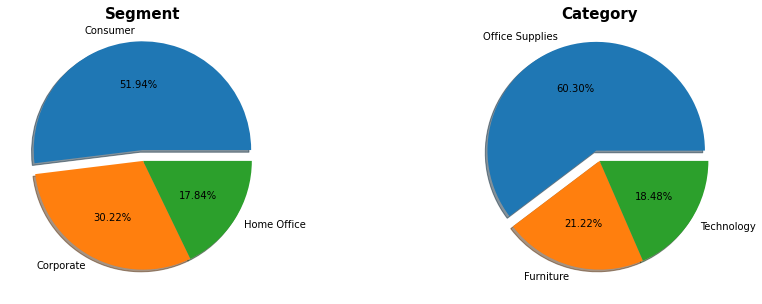

In [13]:
plt.subplots(1,2,figsize=(15,5))

plt.subplot(121)
explode = [0.1,0,0]
perc = df['Segment'].value_counts()
lab = list(df['Segment'].value_counts().index)
plt.pie(perc,labels = lab, autopct= "%0.2f%%", explode=explode, shadow=True)
plt.title('Segment', size=15, fontweight='bold')

plt.subplot(122)
explode = [0.1,0,0]
perc = df['Category'].value_counts()
lab = list(df['Category'].value_counts().index)
plt.pie(perc,labels = lab, autopct= "%0.2f%%", explode=explode, shadow=True)
plt.title('Category', size=15, fontweight='bold')

### <div class="alert alert-success">Interpretation</div>
    - There are 51.94% of Segment that fall under consumer segment and only 17.84% in Home Office
    - Most of the Sales is of Office Supplies Category which is upto 60.30% and least sales is of Technology which is 18.48%.
    

<AxesSubplot:title={'center':'Profit'}, xlabel='Profit', ylabel='Count'>

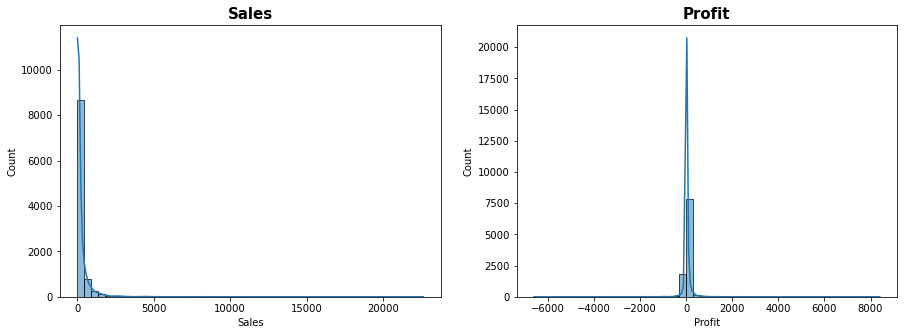

In [14]:
plt.subplots(1,2, figsize=(15,5))

plt.subplot(121)
plt.title('Sales', size=15, fontweight='bold')
plt.xlabel('Sales')
sns.histplot(df['Sales'], bins=50, kde=True)

plt.subplot(122)
plt.title('Profit', size=15, fontweight='bold')
plt.xlabel('Profit')
sns.histplot(df['Profit'], bins=50, kde=True)

### <div class="alert alert-success">Interpretation</div>
    - Most of the Sales count is 0 and till 2000 there is some counts of sales.
    - Most of the store are getting 0 profit and others are in loss.

<AxesSubplot:title={'center':'Region'}, xlabel='Region', ylabel='count'>

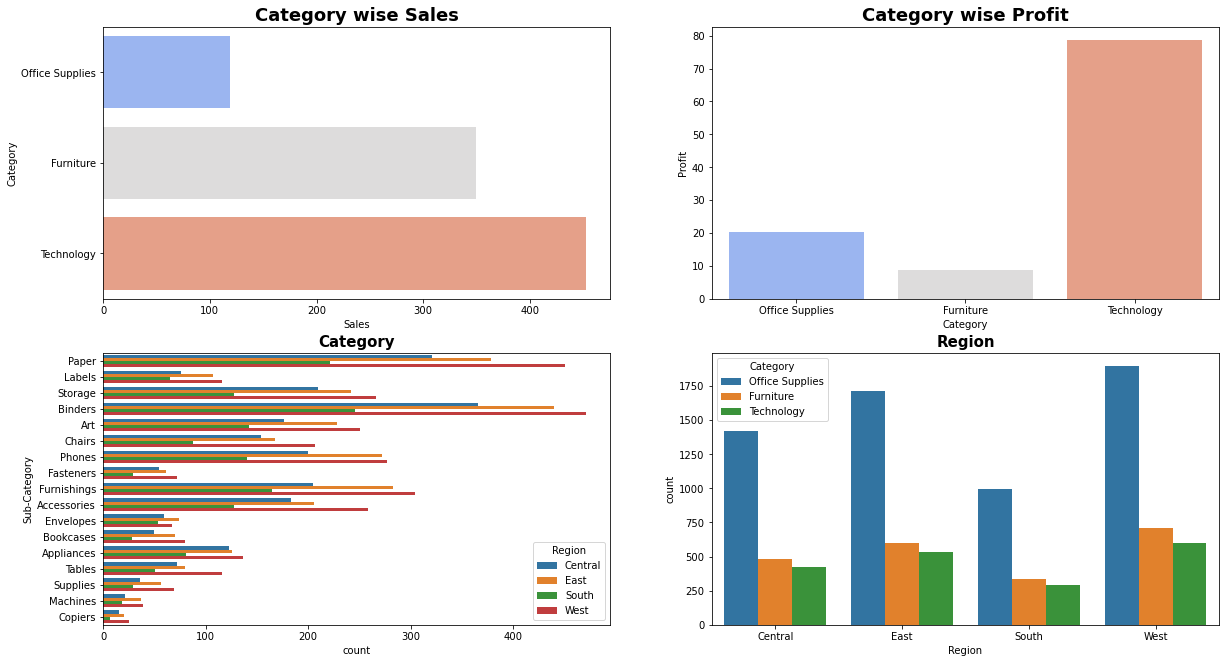

In [15]:
plt.subplots(2,2,figsize=(20,11))

plt.subplot(221)
plt.title('Segment - Sales', size=15, fontweight='bold')
plt.title("Category wise Sales",fontweight='bold',fontsize=18)
sns.barplot(y=df['Category'], x=df['Sales'],palette='coolwarm',ci=None)

plt.subplot(222)
plt.title("Category wise Profit",fontweight='bold',fontsize=18)
sns.barplot(x=df['Category'], y=df['Profit'],palette='coolwarm',ci=None)

plt.subplot(223)
plt.title('Category', size=15, fontweight='bold')
plt.xlabel('Category')
sns.countplot(y=df['Sub-Category'], hue=df['Region'])

plt.subplot(224)
plt.title('Region', size=15, fontweight='bold')
plt.xlabel('Region')
sns.countplot(x=df['Region'], hue=df['Category'])

### <div class="alert alert-success">Interpretation</div>

    - In Category wise Sales graph, Technology category has the highest Sales.
    - In Category wise Profit graph, Technology category has the highest profit.
    - In Sub-Category Region graph, we can see that the Eastern and Western region have higher sales in Binders and Papers.
    - In Category - Region graph, we can see that in Wester region most of the sales is of Office Supplies and in South Region Technology Category have least sales.

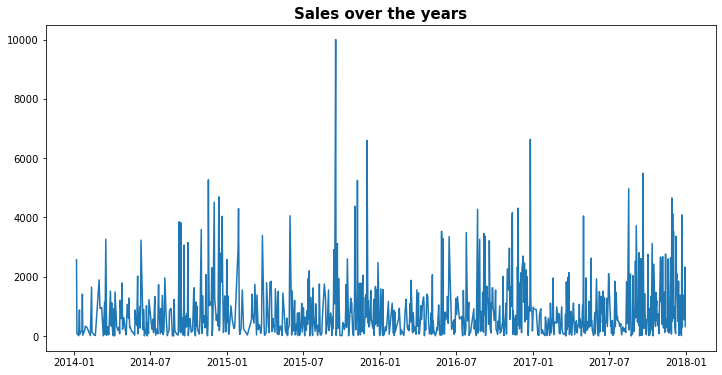

In [16]:
plt.figure(figsize=(12,6))
plt.title('Sales over the years' , fontsize = 15, fontweight='bold')
plt.plot(df_new)
plt.show()

### <div class="alert alert-success">Interpretation</div>

     - Here the graph shows us the sales data over the year from 2014 to 2018.

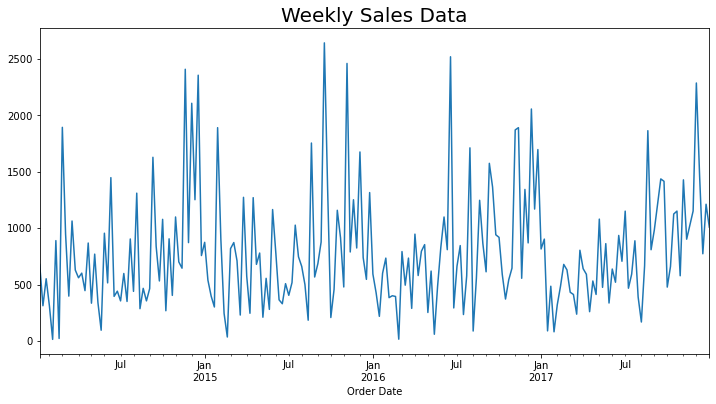

In [17]:
weekly = df_new.resample('W').mean()
plt.title('Weekly Sales Data', size=20)
weekly.plot(figsize = (12,6))
plt.show()

### <div class="alert alert-success">Interpretation</div>

    - Here on the basis of above graph we can see the weekly data and in the month of February and march there is some seasonality i.e there is fall in sales every year.

### Seasonal Decompose

In [18]:
# importing library
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(weekly, period=12)
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

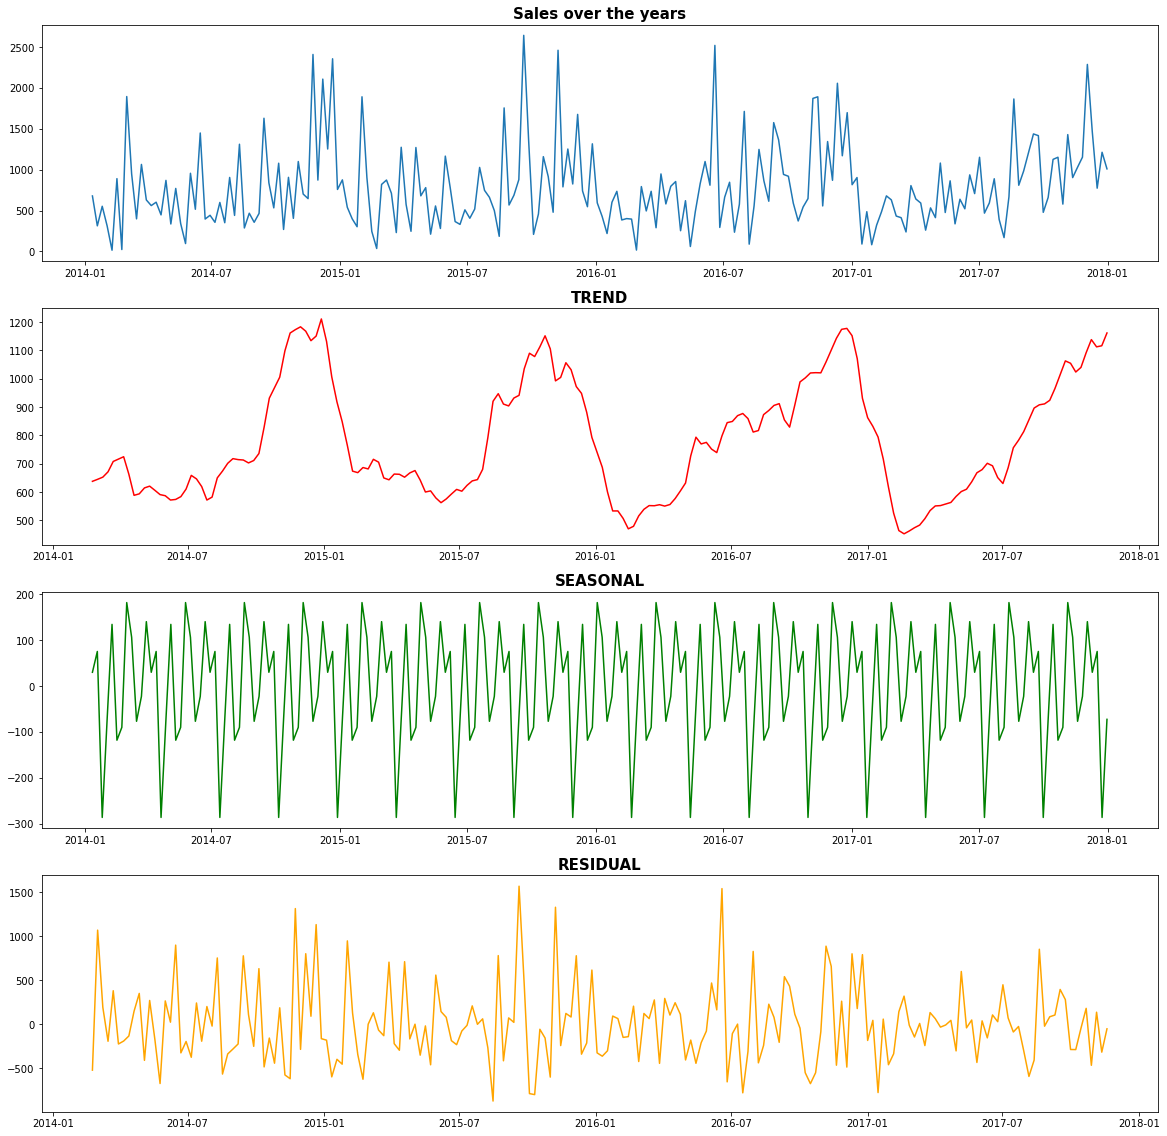

In [19]:
fig,ax = plt.subplots(figsize=(20,20))

plt.subplot(411)
plt.title('Sales over the years' , fontsize = 15, fontweight='bold')
plt.plot(weekly)

plt.subplot(412)
plt.title('TREND' , fontsize = 15, fontweight='bold')
plt.plot(trend,color='red')

plt.subplot(413)
plt.title('SEASONAL' , fontsize = 15, fontweight='bold')
plt.plot(seasonal,color='green')

plt.subplot(414)
plt.title('RESIDUAL' , fontsize = 15, fontweight='bold')
plt.plot(residual,color='orange')
plt.show()

### <div class="alert alert-success">Interpretation</div>

    - The first graph shows us the actual sales graph.
    - In second graph we can see a trend which is a upward trend in sales.
    - The third graph shows us a repeated pattern which means there is some seasonality.
    - The fourth graph shows the irregularities in the dataset.

### <center><div class="alert alert-info">MODEL BUILDING AND TRAINING</div>

### Checking Stationarity

In [20]:
# importin library
from statsmodels.tsa.stattools import adfuller
def stationarity(data):
    pvalue = adfuller(data)[1] 
    if pvalue<=0.05:
        print('Data is Stationary')
    else:
        print('Please Do Differencing to make the Data Stationary')

In [21]:
stationarity(weekly)

Data is Stationary


### Plotting ACF and PCF graph to get p and q value

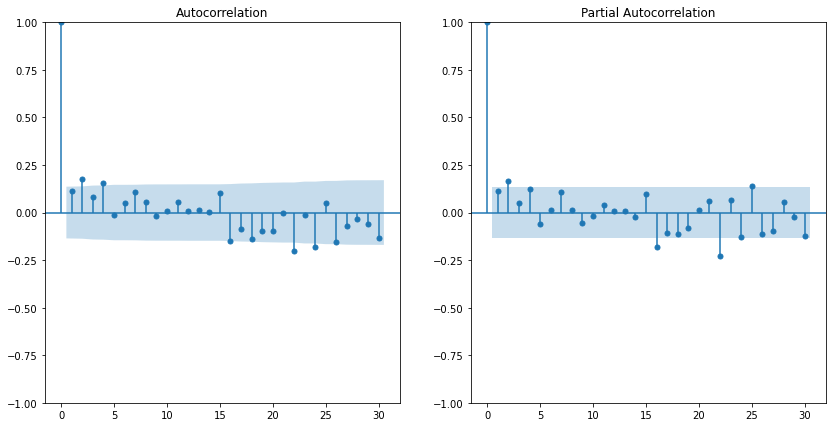

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(1,2, figsize=(14,7))
plot_acf(weekly, lags=30, ax=ax[0]);
plot_pacf(weekly, lags=30, ax=ax[1]);

### Interpretation 
    - In Partial autocorrelation p = 3
    - In Autocorrelation q = 4

## ARMA MODEL

In [23]:
# import auto arima library
from pmdarima.arima import auto_arima

In [24]:
# Splitting the data

train_num = int(0.8*len(weekly))
train = weekly.iloc[:train_num]
test = weekly.iloc[train_num:]
print(f'Train : {len(train)}, Test : {len(test)}')

Train : 166, Test : 42


In [25]:
li=[]                                                  # We Create a list of all combintions 
for i in range(3):
    for j in range(4):
        li.append((i,0,j))                             #We app
li

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3)]

In [26]:
# importing library
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

model_ari = ARIMA(train, order=(2,0,0)).fit()
fcast_ari = model_ari.fittedvalues         # forecasting train data
fcast_ari

Order Date
2014-01-12    770.175729
2014-01-19    763.455826
2014-01-26    726.994436
2014-02-02    680.597181
2014-02-09    705.912817
                 ...    
2017-02-12    628.017755
2017-02-19    677.924835
2017-02-26    717.093623
2017-03-05    746.460730
2017-03-12    726.281717
Freq: W-SUN, Length: 166, dtype: float64

In [27]:
test_forecast1 = pd.DataFrame(model_ari.forecast(len(test)))        # forecasting test data
test_forecast1

,predicted_mean
2017-03-19,692.048593
2017-03-26,705.769047
2017-04-02,753.229142
2017-04-09,758.403675
2017-04-16,766.633536
2017-04-23,767.997022
2017-04-30,769.452480
2017-05-07,769.768390
2017-05-14,770.030337
2017-05-21,770.098953


In [28]:
arma_mse = (mean_squared_error(test,test_forecast1)).round(3)
arma_rmse = (mean_squared_error(test,test_forecast1, squared=False)).round(3)
arma_aic = (model_ari.aic).round(3)
arma_bic = (model_ari.bic).round(3)

print('MSE :',arma_mse)
print('RMSE :',arma_rmse)
print('ARMA aic:',arma_aic)
print('ARMA bic:',arma_bic)

MSE : 199738.663
RMSE : 446.921
ARMA aic: 2557.142
ARMA bic: 2569.59


### Summarising the data

In [29]:
model_ari.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  166
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1274.571
Date:                Thu, 15 Dec 2022   AIC                           2557.142
Time:                        18:01:25   BIC                           2569.590
Sample:                    01-12-2014   HQIC                          2562.194
                         - 03-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        770.1757     73.430     10.489      0.000     626.255     914.097
ar.L1          0.0608      0.095      0.641      0.521      -0.125       0.247
ar.L2          0.1668      0.074      2.262      0.024       0.022       0.311
sigma2      2.753e+05   3.01e+04      9.134      0.000    2.16e+05    3.34e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                71.19
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             1.33
Prob(H) (two-sided):                  0.81   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

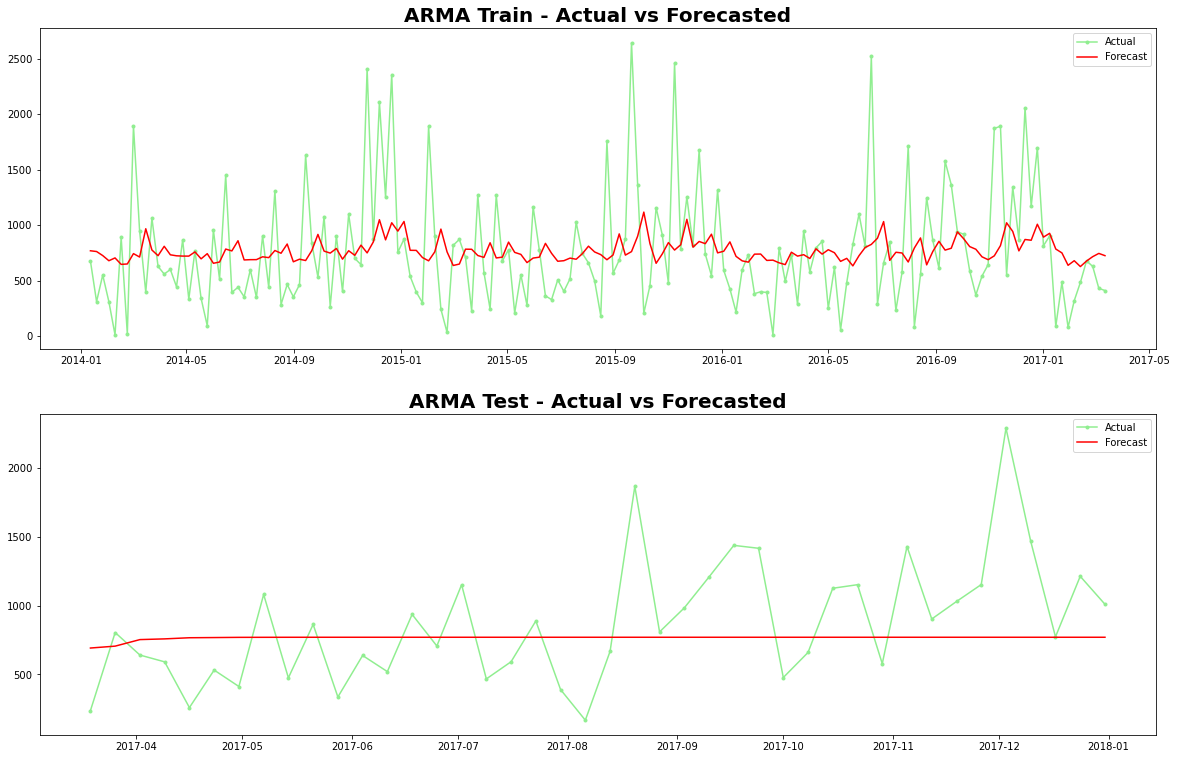

In [30]:
# plotting the graph
plt.figure(figsize=(20,13))

plt.subplot(211)
plt.title('ARMA Train - Actual vs Forecasted', size=20, fontweight='bold')
plt.plot(train, marker = '.', color = 'lightgreen' , label = 'Actual')
plt.plot(fcast_ari, color = 'red' , label = 'Forecast' )
plt.legend()

plt.subplot(212)
plt.title('ARMA Test - Actual vs Forecasted', size=20, fontweight='bold')
plt.plot(test, marker = '.', color = 'lightgreen' , label = 'Actual')
plt.plot(test_forecast1, color = 'red' , label = 'Forecast' )
plt.legend()
plt.show()

## SARIMA MODEL

In [31]:
# Checking best p and q value with auto arima
auto_sari = auto_arima(weekly, start_p=0, max_p=3, start_q=0, max_q=4, seasonal=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3192.403, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3191.792, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3192.489, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3441.433, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3188.005, Time=0.34 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3189.490, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3189.853, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3192.442, Time=0.19 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3191.482, Time=0.36 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3235.109, Time=0.14 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 1.789 seconds


In [32]:
# importing library and making model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sari = SARIMAX(train,order=(2,0,0), seasonal_order=(2,0,0,30)).fit()

In [33]:
fcast_sari = model_sari.fittedvalues        # forecasting train data
fcast_sari

Order Date
2014-01-12      0.000000
2014-01-19    450.267145
2014-01-26    431.977436
2014-02-02    340.766485
2014-02-09    371.506463
                 ...    
2017-02-12     98.282820
2017-02-19    410.962084
2017-02-26    422.792353
2017-03-05    511.544376
2017-03-12    431.851600
Freq: W-SUN, Length: 166, dtype: float64

In [34]:
test_forecast2 = pd.DataFrame(model_sari.forecast(len(test)))       # forecasting test data
test_forecast2

,predicted_mean
2017-03-19,365.748129
2017-03-26,370.110937
2017-04-02,290.482416
2017-04-09,247.409229
2017-04-16,221.834964
2017-04-23,164.274758
2017-04-30,234.843241
2017-05-07,188.782849
2017-05-14,205.226629
2017-05-21,134.669031


In [35]:
sarima_mse = (mean_squared_error(test,test_forecast2)).round(3)
sarima_rmse = (mean_squared_error(test,test_forecast2,squared=False)).round(3)
sarima_aic = (model_sari.aic).round(3)
sarima_bic = (model_sari.bic).round(3)

print('MSE :',sarima_mse)
print('RMSE :',sarima_rmse)
print('sarima aic:',sarima_aic)
print('sarima bic:',sarima_bic)

MSE : 747830.198
RMSE : 864.772
sarima aic: 2597.188
sarima bic: 2612.748


### Summarising data

In [36]:
model_sari.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  166
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 30)   Log Likelihood               -1293.594
Date:                            Thu, 15 Dec 2022   AIC                           2597.188
Time:                                    18:01:32   BIC                           2612.748
Sample:                                01-12-2014   HQIC                          2603.504
                                     - 03-12-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3474      0.094      3.700      0.000       0.163       0.531
ar.L2          0.4770      0.073      6.539      0.000       0.334       0.620
ar.S.L30      -0.0214      0.101     -0.212      0.832      -0.218       0.176
ar.S.L60       0.1181      0.102      1.153      0.249      -0.083       0.319
sigma2      3.476e+05   3.17e+04     10.953      0.000    2.85e+05     4.1e+05
===================================================================================
Ljung-Box (L1) (Q):                   4.61   Jarque-Bera (JB):                23.88
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                             0.72
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

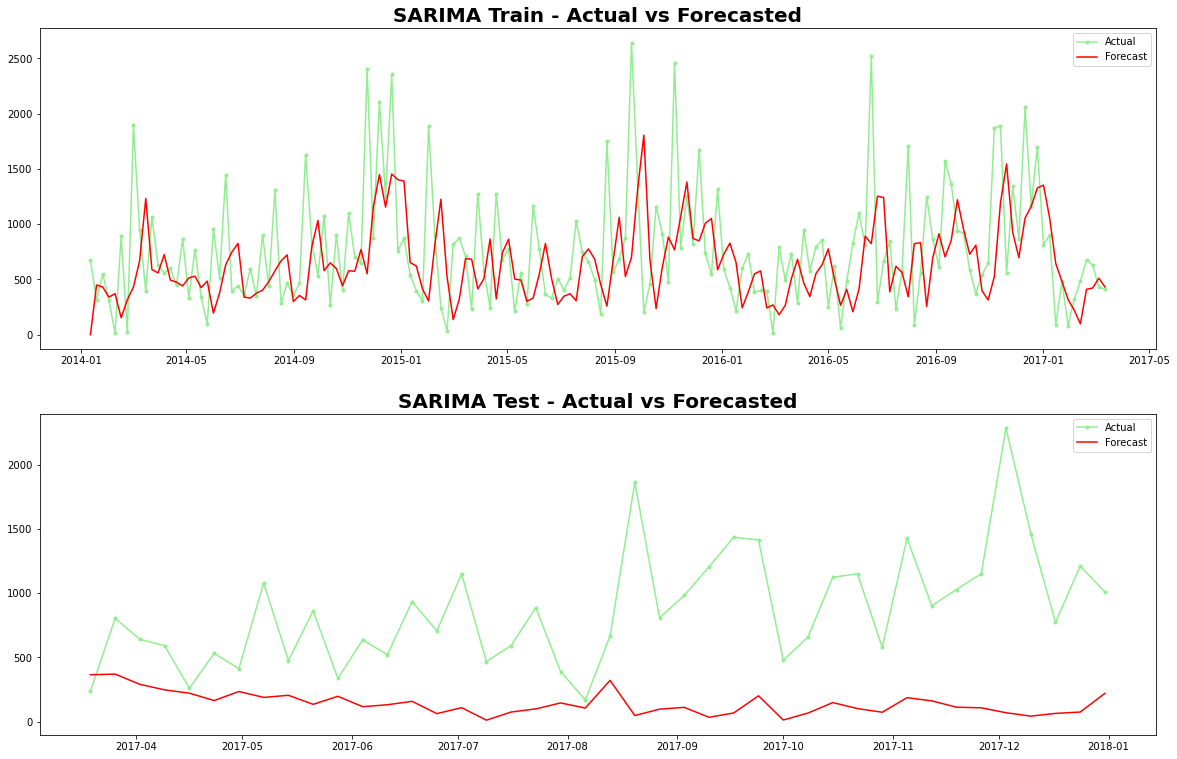

In [37]:
# plotting the graph
plt.figure(figsize=(20,13))

plt.subplot(211)
plt.title('SARIMA Train - Actual vs Forecasted', size=20, fontweight='bold')
plt.plot(train, marker = '.', color = 'lightgreen' , label = 'Actual')
plt.plot(fcast_sari, color = 'red' , label = 'Forecast' )
plt.legend()

plt.subplot(212)
plt.title('SARIMA Test - Actual vs Forecasted', size=20, fontweight='bold')
plt.plot(test, marker = '.', color = 'lightgreen' , label = 'Actual')
plt.plot(test_forecast2, color = 'red' , label = 'Forecast' )
plt.legend()
plt.show()

## SARIMAX MODEL

In [38]:
df.columns

Index(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [39]:
new_df = df.groupby(['Order Date'])['Sales','Discount','Profit'].sum()
new_df.head(3)

,Sales,Discount,Profit
Order Date,,,
2014-01-03,16.448,0.2,5.5512
2014-01-04,288.060,1.2,-65.9901
2014-01-05,19.536,0.2,4.8840


In [40]:
weekly1 = new_df.resample('W').mean()

In [41]:
train_num1 = int(0.8*len(weekly1))
train1 = weekly1.iloc[:train_num1]
test1 = weekly1.iloc[train_num1:]
print(f'Train : {len(train1)}, Test : {len(test1)}')

Train : 167, Test : 42


In [42]:
exog_train = train1[['Discount','Profit']]
exog_test = test1[['Discount','Profit']]

In [43]:
# importing library
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Making model
model_sarix = SARIMAX(train1['Sales'], order=(2,0,0), seasonal_order=(2,0,0,30), exog=exog_train).fit()

In [44]:
fcast_sarix = model_sarix.fittedvalues        # forecasting train data
fcast_sarix

Order Date
2014-01-05     596.512076
2014-01-12     834.133421
2014-01-19    1124.214544
2014-01-26     582.643240
2014-02-02     370.389009
                 ...     
2017-02-12    1069.642902
2017-02-19    1400.060337
2017-02-26    1180.118918
2017-03-05    1496.255325
2017-03-12    1182.393622
Freq: W-SUN, Length: 167, dtype: float64

In [45]:
test_forecast3 = model_sarix.forecast(len(test1), exog=exog_test.values)       # forecasting test data
test_forecast3

2017-03-19    2348.215677
2017-03-26    3472.112418
2017-04-02    1715.586516
2017-04-09    1768.685518
2017-04-16    1652.284369
2017-04-23    2030.330687
2017-04-30    1798.887126
2017-05-07    1928.110956
2017-05-14    2387.695611
2017-05-21    2052.251190
2017-05-28    1728.607411
2017-06-04    2395.592994
2017-06-11    1828.874315
2017-06-18    2584.399507
2017-06-25    2314.111074
2017-07-02    1907.076096
2017-07-09    2650.728909
2017-07-16     883.801996
2017-07-23    2252.941401
2017-07-30    1313.398597
2017-08-06    1117.718871
2017-08-13    1825.000976
2017-08-20    2147.311012
2017-08-27    2271.215724
2017-09-03    3074.050025
2017-09-10    4381.762478
2017-09-17    3315.900841
2017-09-24    3223.926885
2017-10-01    2522.071425
2017-10-08    2622.440262
2017-10-15    2563.566303
2017-10-22    3520.746834
2017-10-29    2104.764090
2017-11-05    2868.135193
2017-11-12    3556.109531
2017-11-19    4409.011833
2017-11-26    3431.407359
2017-12-03    4156.204347
2017-12-10  

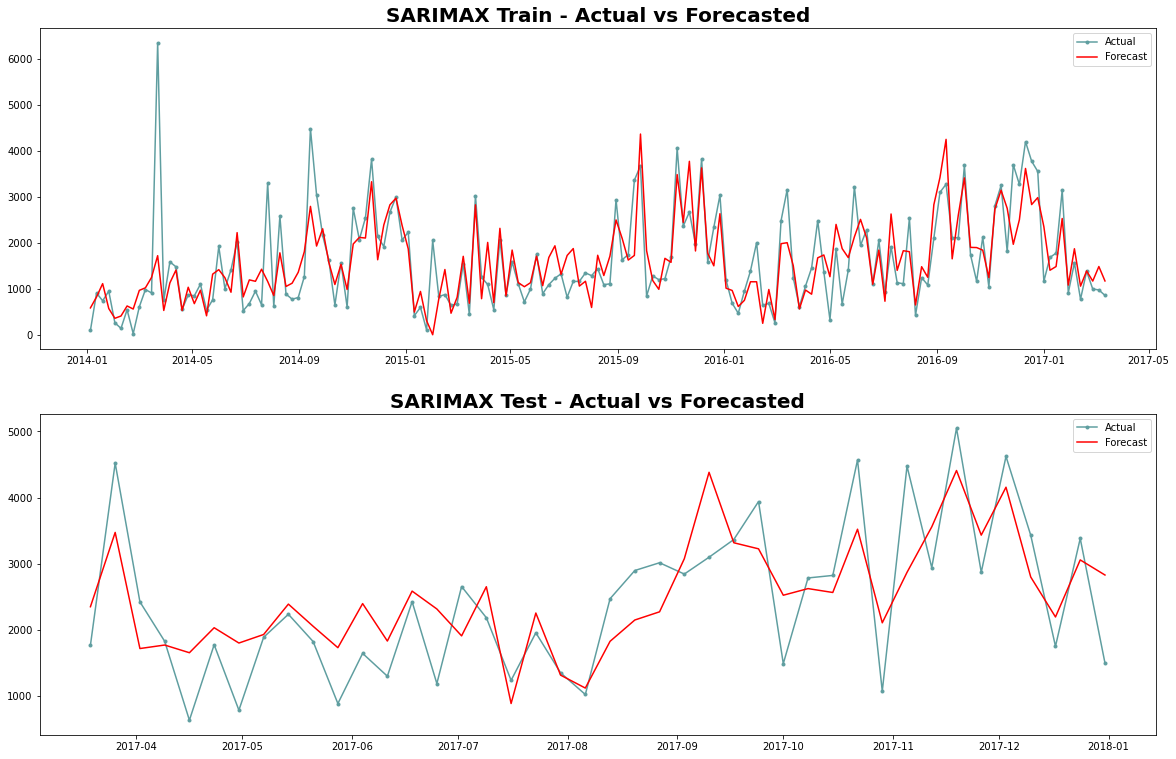

In [46]:
# plotting the graph
plt.figure(figsize=(20,13))

plt.subplot(211)
plt.title('SARIMAX Train - Actual vs Forecasted', size=20, fontweight='bold')
plt.plot(train1['Sales'], marker = '.', color = 'cadetblue' , label = 'Actual')
plt.plot(fcast_sarix, color = 'red' , label = 'Forecast' )
plt.legend()

plt.subplot(212)
plt.title('SARIMAX Test - Actual vs Forecasted', size=20, fontweight='bold')
plt.plot(test1['Sales'], marker = '.', color = 'cadetblue' , label = 'Actual')
plt.plot(test_forecast3, color = 'red' , label = 'Forecast' )
plt.legend()
plt.show()

In [47]:
sarimax_mse = (mean_squared_error(test1.Sales,test_forecast3)).round(3)
sarimax_rmse = (mean_squared_error(test1.Sales,test_forecast3,squared=False)).round(3)
sarimax_aic = (model_sarix.aic).round(3)
sarimax_bic = (model_sarix.bic).round(3)

print('MSE :',sarimax_mse)
print('RMSE :',sarimax_rmse)
print('sarima aic:',sarimax_aic)
print('sarima bic:',sarimax_bic)

MSE : 511458.351
RMSE : 715.163
sarima aic: 2661.906
sarima bic: 2683.732


### Summarising the data

In [48]:
model_sarix.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  167
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 30)   Log Likelihood               -1323.953
Date:                            Thu, 15 Dec 2022   AIC                           2661.906
Time:                                    18:01:39   BIC                           2683.732
Sample:                                01-05-2014   HQIC                          2670.765
                                     - 03-12-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Discount    1172.8121     50.463     23.241      0.000    1073.907    1271.717
Profit         1.5654      0.251      6.238      0.000       1.073       2.057
ar.L1          0.0048      0.116      0.041      0.967      -0.223       0.233
ar.L2         -0.0668      0.095     -0.701      0.483      -0.254       0.120
ar.S.L30      -0.0129      0.149     -0.087      0.931      -0.306       0.280
ar.S.L60      -0.0303      0.097     -0.314      0.754      -0.220       0.159
sigma2      4.546e+05   2.73e+04     16.658      0.000    4.01e+05    5.08e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1322.55
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                             2.45
Prob(H) (two-sided):                  0.02   Kurtosis:                        15.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### <center><div class="alert alert-info">COMPARISION</div>

In [49]:
from statsmodels.graphics.tsaplots import plot_predict

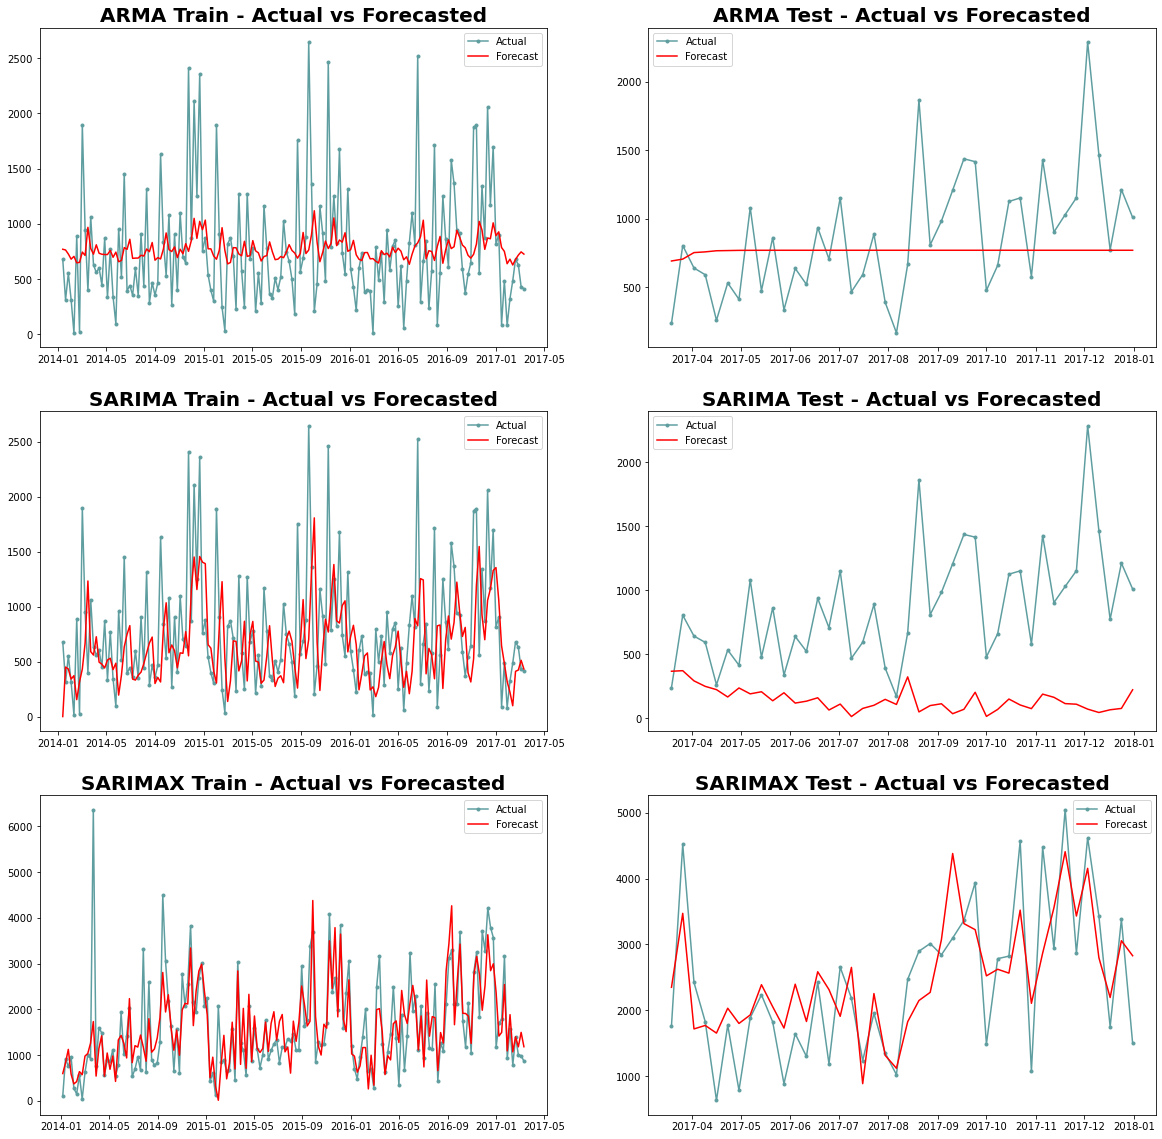

In [50]:
fig,ax = plt.subplots(3,2,figsize=(20,20))

plt.subplot(321)
plt.title('ARMA Train - Actual vs Forecasted', size=20, fontweight='bold')
plt.plot(train, marker = '.', color = 'cadetblue' , label = 'Actual')
plt.plot(fcast_ari, color = 'red' , label = 'Forecast' )
plt.legend()

plt.subplot(322)
plt.title('ARMA Test - Actual vs Forecasted', size=20, fontweight='bold')
plt.plot(test, marker = '.', color = 'cadetblue' , label = 'Actual')
plt.plot(test_forecast1, color = 'red' , label = 'Forecast' )
plt.legend()

plt.subplot(323)
plt.title('SARIMA Train - Actual vs Forecasted', size=20, fontweight='bold')
plt.plot(train, marker = '.', color = 'cadetblue' , label = 'Actual')
plt.plot(fcast_sari, color = 'red' , label = 'Forecast' )
plt.legend()

plt.subplot(324)
plt.title('SARIMA Test - Actual vs Forecasted', size=20, fontweight='bold')
plt.plot(test, marker = '.', color = 'cadetblue' , label = 'Actual')
plt.plot(test_forecast2, color = 'red' , label = 'Forecast' )
plt.legend()

plt.subplot(325)
plt.title('SARIMAX Train - Actual vs Forecasted', size=20, fontweight='bold')
plt.plot(train1['Sales'], marker = '.', color = 'cadetblue' , label = 'Actual')
plt.plot(fcast_sarix, color = 'red' , label = 'Forecast' )
plt.legend()

plt.subplot(326)
plt.title('SARIMAX Test - Actual vs Forecasted', size=20, fontweight='bold')
plt.plot(test1['Sales'], marker = '.', color = 'cadetblue' , label = 'Actual')
plt.plot(test_forecast3, color = 'red' , label = 'Forecast' )
plt.legend()
plt.show()

### Interpretation - 
        - Based on the graphs we can see that SARIMAX Training and Testing Forecasted line are properly matching with the Actual data points. 
        - ARMA model cant be used as it doesnt detect the seasonality and works only on trend.
        - SARIMA model also cant be used as its testing forecasted line doesnt matches with actual data point.

In [51]:
compare = pd.DataFrame({'ARMA':[arma_aic,arma_bic,arma_mse,arma_rmse],
                       'SARIMA':[sarima_aic,sarima_bic,sarima_mse,sarima_rmse],
                       'SARIMAX':[sarimax_aic,sarimax_bic,sarimax_mse,sarimax_rmse]}, index=['AIC','BIC','MSE','RMSE'])
compare

,ARMA,SARIMA,SARIMAX
AIC,2557.142,2597.188,2661.906
BIC,2569.590,2612.748,2683.732
MSE,199738.663,747830.198,511458.351
RMSE,446.921,864.772,715.163


## Forecasting the sales


In [52]:
exog_new = weekly1[['Discount','Profit']]
sarimax_model1 = SARIMAX(weekly1.Sales,order=(2,0,3),seasonal_order=(2,0,3,52),exog= exog_new.values).fit()
sarimax_forecast1 = sarimax_model1.forecast(50, exog=exog_new.values[:50])     # Forcast the values

C:\Users\jiten\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


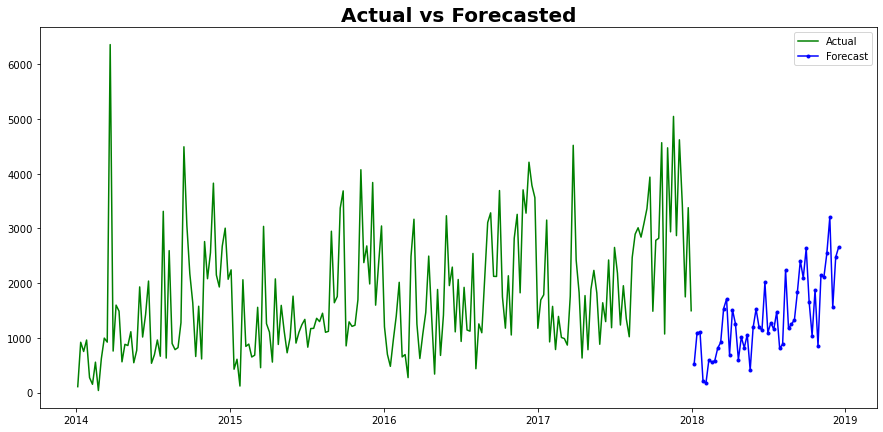

In [53]:
fig, ax = plt.subplots(figsize=(15, 7))

plt.title('Actual vs Forecasted', size=20, fontweight='bold')
plt.plot(weekly1['Sales'], color = 'green' , label = 'Actual')
#plt.plot(train1['Sales'], color='tomato', label='Train')
plt.plot(sarimax_forecast1,marker = '.', color = 'blue' , label = 'Forecast')
plt.legend()
plt.show()

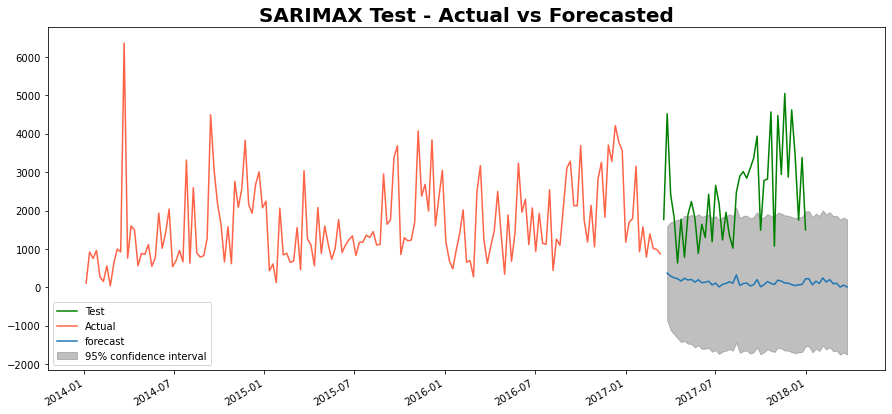

In [54]:
fig, ax = plt.subplots(figsize=(15, 7))

plt.title('SARIMAX Test - Actual vs Forecasted', size=20, fontweight='bold')
plt.plot(test1['Sales'], color = 'green' , label = 'Test')
plt.plot(train1['Sales'], color='tomato', label='Actual')
plot_predict(model_sari,len(train1),len(train1)+52, ax=ax)
plt.show()

### ***Above Plot shows the future predictions of 1 years from 2018 to 2019.***

### <center><div class="alert alert-info">CONCLUSION</div>
    - The forecasting of Furniture Category has been done based on 2 models ARMA and SARIMA. 
    - The data has been taken on Weekly basis and graphs has been made based on weekly basis only
    - As the Seasonality exist in the data and also the trend ARMA model cant predict the forecasted seasonality.
    - To tackle this situation SARIMA model is prepared which takes the Seasonality into the account.
    - Even though there is less MSE and RMSE Values present in ARMA Model it cant predict the forecasted seasonality and    hence SARIMA model is chosen for the forecasting.
    - Based on the SARIMA model, we can see the forecasted values for upcoming 1 Years from there we can see 
            * The Actual Lines shows the upward Trend till 2018
            * Forecasted Lines falls to 0 till the beginning of of 2018 and till it gets to the end of 2018 its almost 0.
    - So we can say that the sales of Furiniture category may fall down till the end of 2018           

### <center><div class="alert alert-info">BUSINESS IMPLICATIONS</div>
     - Having a Store in a Consumer Segment will be beneficial for the sales and profit and will be least in Home Office.
     - If Store owner have Furniture Category it will give the business better opportunity than Technology.
     - In every Segment most of the sales is 0 and maximum sales goes for Home Office which is upto 25000.
     - Eastern and Western region have higher in Furniture Category so having business in these region willbe better option.
     - Western region most of the sales is of Office Supplies and in South Region Technology Category have least sales.